### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset  

In [2]:
df = pd.read_csv('SavedData/simulated_transaction_2024.csv')

In [3]:
df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


### Cleaning the dataset

In [4]:
# Dataset overview
print(df.shape)
df.describe()

(230596, 7)


,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


We can see here that the overall number of rows in the dataframe is 230596, yet from the count row in the describe() table, we see there will be some missing values. 

In [5]:
# Identifying the missing values
sum_missing_values = df.isnull().sum()
sum_missing_values

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

I think it is acceptable to remove the rows which contain missing values for Date, Timestamp, Account No, Balance and amount as, even if there is no overlaps between these missing values in the rows (which I will check if there is), these sum to 1159 missing values (229 + 251 + 224 + 246 + 209). This represents 0.5% of the dataset, which is acceptable to remove. For the Third Party Account No, and the Third Party Name, a row will only be removed if both columns are null. 

In [6]:
# Calculate rows with null values for both 'Third Party Account No' and 'Third Party Name'
null_third_party = df[df['Third Party Account No'].isnull() & 
                                              df['Third Party Name'].isnull()]

null_third_party

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1839,01/01/2023,00:00,221356538.0,714.020000,-100.00,NaN,NaN
2173,01/01/2023,00:00,977899503.0,2521.020000,-12.99,NaN,NaN
2388,01/01/2023,00:00,912584712.0,960.040000,-15.99,NaN,NaN
3027,01/01/2023,00:00,769311479.0,-147.940000,-18.99,NaN,NaN
5214,01/01/2023,12:40,175452235.0,-104.260000,-319.20,NaN,NaN
...,...,...,...,...,...,...,...
228343,03/12/2023,05:58,108481285.0,10767.326581,-2.80,NaN,NaN
228447,03/12/2023,10:17,659415300.0,2695.894296,-5.40,NaN,NaN
228540,03/12/2023,11:26,258201793.0,-444.809800,-40.88,NaN,NaN
229016,04/12/2023,08:34,215426302.0,1118.800404,-43.20,NaN,NaN


A further 247 null rows brings a total of 1406 rows with null values. This is 0.6% of the data. Need to investigate if there are any duplicates within this.

In [7]:
# Displaying rows with missing values in 'Date', 'Timestamp', 'Account No', 'Balance', and 'Amount'
missing_critical_info = df[df['Date'].isnull() | 
                             df['Timestamp'].isnull() | 
                             df['Account No'].isnull() | 
                             df['Balance'].isnull() | 
                             df['Amount'].isnull()]

# Combine using 'pd.concat', assuming no common rows between the two subsets
combined_null_data = pd.concat([null_third_party, missing_critical_info], axis=0).drop_duplicates()

# Display the combined dataframe
combined_null_data

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1839,01/01/2023,00:00,221356538.0,714.020000,-100.00,NaN,NaN
2173,01/01/2023,00:00,977899503.0,2521.020000,-12.99,NaN,NaN
2388,01/01/2023,00:00,912584712.0,960.040000,-15.99,NaN,NaN
3027,01/01/2023,00:00,769311479.0,-147.940000,-18.99,NaN,NaN
5214,01/01/2023,12:40,175452235.0,-104.260000,-319.20,NaN,NaN
...,...,...,...,...,...,...,...
229764,05/12/2023,09:17,117273481.0,NaN,-6.15,NaN,Starbucks
229970,05/12/2023,17:43,497772347.0,47.741750,NaN,NaN,Matalan
230045,NaN,19:52,196289502.0,18280.425041,-49.93,NaN,Etsy
230251,06/12/2023,NaN,815385232.0,12245.673605,-2.11,NaN,AMAZON


In [8]:
# Save the combined_null_data dataframe as a CSV file
combined_null_data.to_csv('null_values_dataset2.csv', index=False)


There is a total of 1402 unique rows with null data. It can be interesting to investigate why these rows have null data, perhaps due to the following reasons:

1. **Data Entry Errors:** Manual data entry processes are prone to errors. A field may be left blank accidentally, or an entry might be skipped. This is particularly common in systems where data validation is lax or non-existent.

2. **Missing Information:** At the time of the transaction, some information may not be available or applicable. For example, a transaction might not involve a third party (e.g., a fee applied directly by the bank), resulting in null values in fields like `Third Party Account No` and `Third Party Name`.

3. **Systematic Issues:** Software or systems used for recording transactions might have bugs, glitches, or design limitations that prevent certain information from being recorded. This could lead to systematically missing data in specific fields.

4. **Data Processing and Integration Issues:** When transactional data comes from multiple sources or systems, integration processes might result in missing values. This can happen if different systems have different fields, or if there's a mismatch in how data is mapped and consolidated.

5. **Intentional Placeholder:** Sometimes, null values are used intentionally to indicate that a particular field is not applicable for a specific transaction, rather than an omission or error.

6. **Upgrades or Changes in Data Collection Practices:** If the method or tools for data collection change over time, earlier records might lack information that is only captured due to later updates or changes in policy.

7. **Conditional Fields:** Some fields might only be relevant under specific conditions (e.g., refunds or cancellations might require additional information that is not applicable to other types of transactions).

I will remove them from the dataset to form a `clean_dataset2`, but have saved these null values as a csv file named `null_values_dataset2.csv` to investigate in the future.

In [9]:
# Removing the combined_null_data from the orginal df

# First, we need to identify the rows in 'df' that correspond to those in 'combined_null_data'
# We will use an inner join on key columns to find matching rows that should be removed
key_columns = ['Date', 'Timestamp', 'Account No', 'Balance', 'Amount']
dataset2_cleaned = pd.merge(df, combined_null_data[key_columns], on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

dataset2_cleaned.isnull().sum()

Date                           0
Timestamp                      0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    222389
Third Party Name            6805
dtype: int64

In [10]:
# Checking for duplicates in the cleaned dataframe to ensure all rows are unique
dataset2_cleaned.duplicated().sum()

0

In [11]:
dataset2_cleaned

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


### Parsing date and time

In [12]:
# First, ensure 'Date' is in datetime format for manipulation and 'Timestamp' as well
dataset2_cleaned['Date'] = pd.to_datetime(dataset2_cleaned['Date'], dayfirst=True)
dataset2_cleaned['Timestamp'] = pd.to_datetime(dataset2_cleaned['Timestamp'], format='%H:%M').dt.time

# Create a 'Datetime' column that combines 'Date' and 'Timestamp'
dataset2_cleaned['Datetime'] = pd.to_datetime(dataset2_cleaned['Date'].astype(str) + ' ' + dataset2_cleaned['Timestamp'].astype(str))

# Formatting 'Date' back to 'dd/mm/yyyy' string format after manipulation
dataset2_cleaned['Date'] = dataset2_cleaned['Date'].dt.strftime('%d/%m/%Y')

dataset2_cleaned

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,01/01/2023,00:00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,01/01/2023,00:00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,01/01/2023,00:00:00,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,01/01/2023,00:00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54:00,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230592,06/12/2023,20:55:00,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230593,06/12/2023,21:05:00,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230594,06/12/2023,21:13:00,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [14]:
# Save cleaned data to CSV file
dataset2_cleaned.to_csv('SavedData/dataset2_cleaned.csv', index=False)

## EDA

### Basic Statistics

In [15]:
basic_stats_dataset2 = {
    'Total Transactions': dataset2_cleaned.shape[0],
    'Unique Accounts': dataset2_cleaned['Account No'].nunique(),
    'Unique Third Party Accounts': dataset2_cleaned['Third Party Account No'].nunique(dropna=True),
    'Unique Third Party Names': dataset2_cleaned['Third Party Name'].nunique(dropna=True),
    'Average Balance': dataset2_cleaned['Balance'].mean(),
    'Average Transaction Amount': dataset2_cleaned['Amount'].mean(),
    'Max Transaction Amount': dataset2_cleaned['Amount'].max(),
    'Min Transaction Amount': dataset2_cleaned['Amount'].min()
}

basic_stats_dataset2

{'Total Transactions': 229194,
 'Unique Accounts': 976,
 'Unique Third Party Accounts': 673,
 'Unique Third Party Names': 83,
 'Average Balance': 3609.2562946910007,
 'Average Transaction Amount': 6.5785616988228295,
 'Max Transaction Amount': 12240.0,
 'Min Transaction Amount': -12240.0}

In [16]:
unique_third_party_names = dataset2_cleaned['Third Party Name'].unique()
print(unique_third_party_names)

['Westport Care Home' 'Barbiee Boutique' nan 'Fat Face' 'Lavender Primary'
 'A Cut Above' 'Tesco' 'Brilliant Brushes' 'Costa Coffee'
 'Premier Finance' 'North Face' 'Craftastic' 'Fitted Stitch' 'Selfridges'
 'Starbucks' 'The Crown' 'Cass Art' 'Green Park Academy' 'Rose & Crown'
 'Kings Arms' 'Sunny Care Nursery' 'A Yarn Story' 'Pets Corner'
 'Lavender Fields' 'Victoria Park' 'Halifax' 'LBG' 'Blizzard' 'Xbox'
 'Mojang Studios' 'PureGym' 'Disney' 'Netflix' 'Grand Union BJJ' 'Amazon'
 'SquareOnix' 'Deliveroo' 'JustEat' 'Coop Local' 'Sainsbury' 'AMAZON'
 'The Works' "Blackwell's" 'Topshop' 'Matalan' 'Foyles' 'Wool'
 'Hobby Lobby' 'Revella' 'Sainsbury Local' 'Loosely Fitted'
 'Stitch By Stitch' 'Coffee #1' 'Hobbycraft' 'Lloyds Pharmacy'
 'Gamestation' 'CeX' 'Etsy' 'Five Senses Art' 'Sports Direct' 'Boots'
 'Reebok' 'JD Sports' 'Head' 'Frankie & Bennies' 'Gap Kids'
 'University College Hospital' 'CPA' 'Happy Days Home' 'Pets at Home'
 'Jollyes' 'Collector Cave' 'Vision Express' 'Green Park'


### Splitting the dataframes into expenditures and payments

In [17]:
# Splitting the dataset2_cleaned dataframe into two based on the condition of the 'Amount' being positive or negative
payments_df = dataset2_cleaned[dataset2_cleaned['Amount'] > 0]
expenditures_df = dataset2_cleaned[dataset2_cleaned['Amount'] < 0]

#### Replacing the negative amounts in expenditures with their absolute values

In [18]:
expenditures_df["Amount"] = expenditures_df["Amount"].abs()

expenditures_df

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_3568/3474846062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df["Amount"] = expenditures_df["Amount"].abs()


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
2,01/01/2023,00:00:00,472213568.0,3012.000000,780.00,283027736.0,NaN,2023-01-01 00:00:00
7,01/01/2023,00:00:00,768271776.0,2840.000000,780.00,215404070.0,NaN,2023-01-01 00:00:00
11,01/01/2023,00:00:00,350921975.0,1998.500000,460.00,633362865.0,NaN,2023-01-01 00:00:00
13,01/01/2023,00:00:00,455831435.0,2603.100000,650.00,442079728.0,NaN,2023-01-01 00:00:00
18,01/01/2023,00:00:00,172084472.0,1149.000000,1300.00,407574996.0,NaN,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54:00,581655972.0,45935.206861,41.06,NaN,Tesco,2023-12-06 20:54:00
230592,06/12/2023,20:55:00,786141370.0,-244.837500,62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230593,06/12/2023,21:05:00,824916823.0,9709.172159,32.94,NaN,Deliveroo,2023-12-06 21:05:00
230594,06/12/2023,21:13:00,366550080.0,26834.165794,19.25,NaN,Amazon,2023-12-06 21:13:00


In [19]:
# Saving these dataframes as CSV files
payments_df.to_csv('SavedData/dataset2_payments.csv', index=False)
expenditures_df.to_csv('SavedData/dataset2_expenditures.csv', index=False)

In [20]:
payments_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,01/01/2023,00:00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
3,01/01/2023,00:00:00,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,01/01/2023,00:00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
5,01/01/2023,00:00:00,203466392.0,4607.660000,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
227484,01/12/2023,20:32:00,812012103.0,-327.604300,250.00,291580432.0,NaN,2023-12-01 20:32:00
227486,01/12/2023,20:35:00,525524239.0,47.652350,380.00,558875206.0,NaN,2023-12-01 20:35:00
227492,01/12/2023,21:26:00,121113546.0,398.453156,120.00,490790931.0,NaN,2023-12-01 21:26:00
228822,04/12/2023,01:08:00,336171116.0,428.428400,380.00,973388795.0,NaN,2023-12-04 01:08:00


In [21]:
most_recent_payment_overall = payments_df['Datetime'].max()
most_recent_payment_overall

Timestamp('2023-12-04 03:09:00')

In [22]:
expenditures_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
2,01/01/2023,00:00:00,472213568.0,3012.000000,780.00,283027736.0,NaN,2023-01-01 00:00:00
7,01/01/2023,00:00:00,768271776.0,2840.000000,780.00,215404070.0,NaN,2023-01-01 00:00:00
11,01/01/2023,00:00:00,350921975.0,1998.500000,460.00,633362865.0,NaN,2023-01-01 00:00:00
13,01/01/2023,00:00:00,455831435.0,2603.100000,650.00,442079728.0,NaN,2023-01-01 00:00:00
18,01/01/2023,00:00:00,172084472.0,1149.000000,1300.00,407574996.0,NaN,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54:00,581655972.0,45935.206861,41.06,NaN,Tesco,2023-12-06 20:54:00
230592,06/12/2023,20:55:00,786141370.0,-244.837500,62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230593,06/12/2023,21:05:00,824916823.0,9709.172159,32.94,NaN,Deliveroo,2023-12-06 21:05:00
230594,06/12/2023,21:13:00,366550080.0,26834.165794,19.25,NaN,Amazon,2023-12-06 21:13:00


The payments_df may include: incomes, transfers from friends, refunds
The expendittures_df is much larger (as expected) and might include paying for goods/services, transferring rent, transferring money to friends etc.

In [23]:
# Finding the most recent transaction in the entire dataset
most_recent_transaction_overall = expenditures_df['Datetime'].max()
most_recent_transaction_overall

Timestamp('2023-12-06 21:32:00')

The most recent transaction occurs on the  2023-12-06 21:32:00

### Expenditure: EDA

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_3568/4132264748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['Datetime'] = pd.to_datetime(expenditures_df['Datetime'])
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_3568/4132264748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['Date'] = pd.to_datetime(expenditures_df['Date'], dayfirst=True)
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_3568/4132264748.py:5: SettingWithCopyWarning

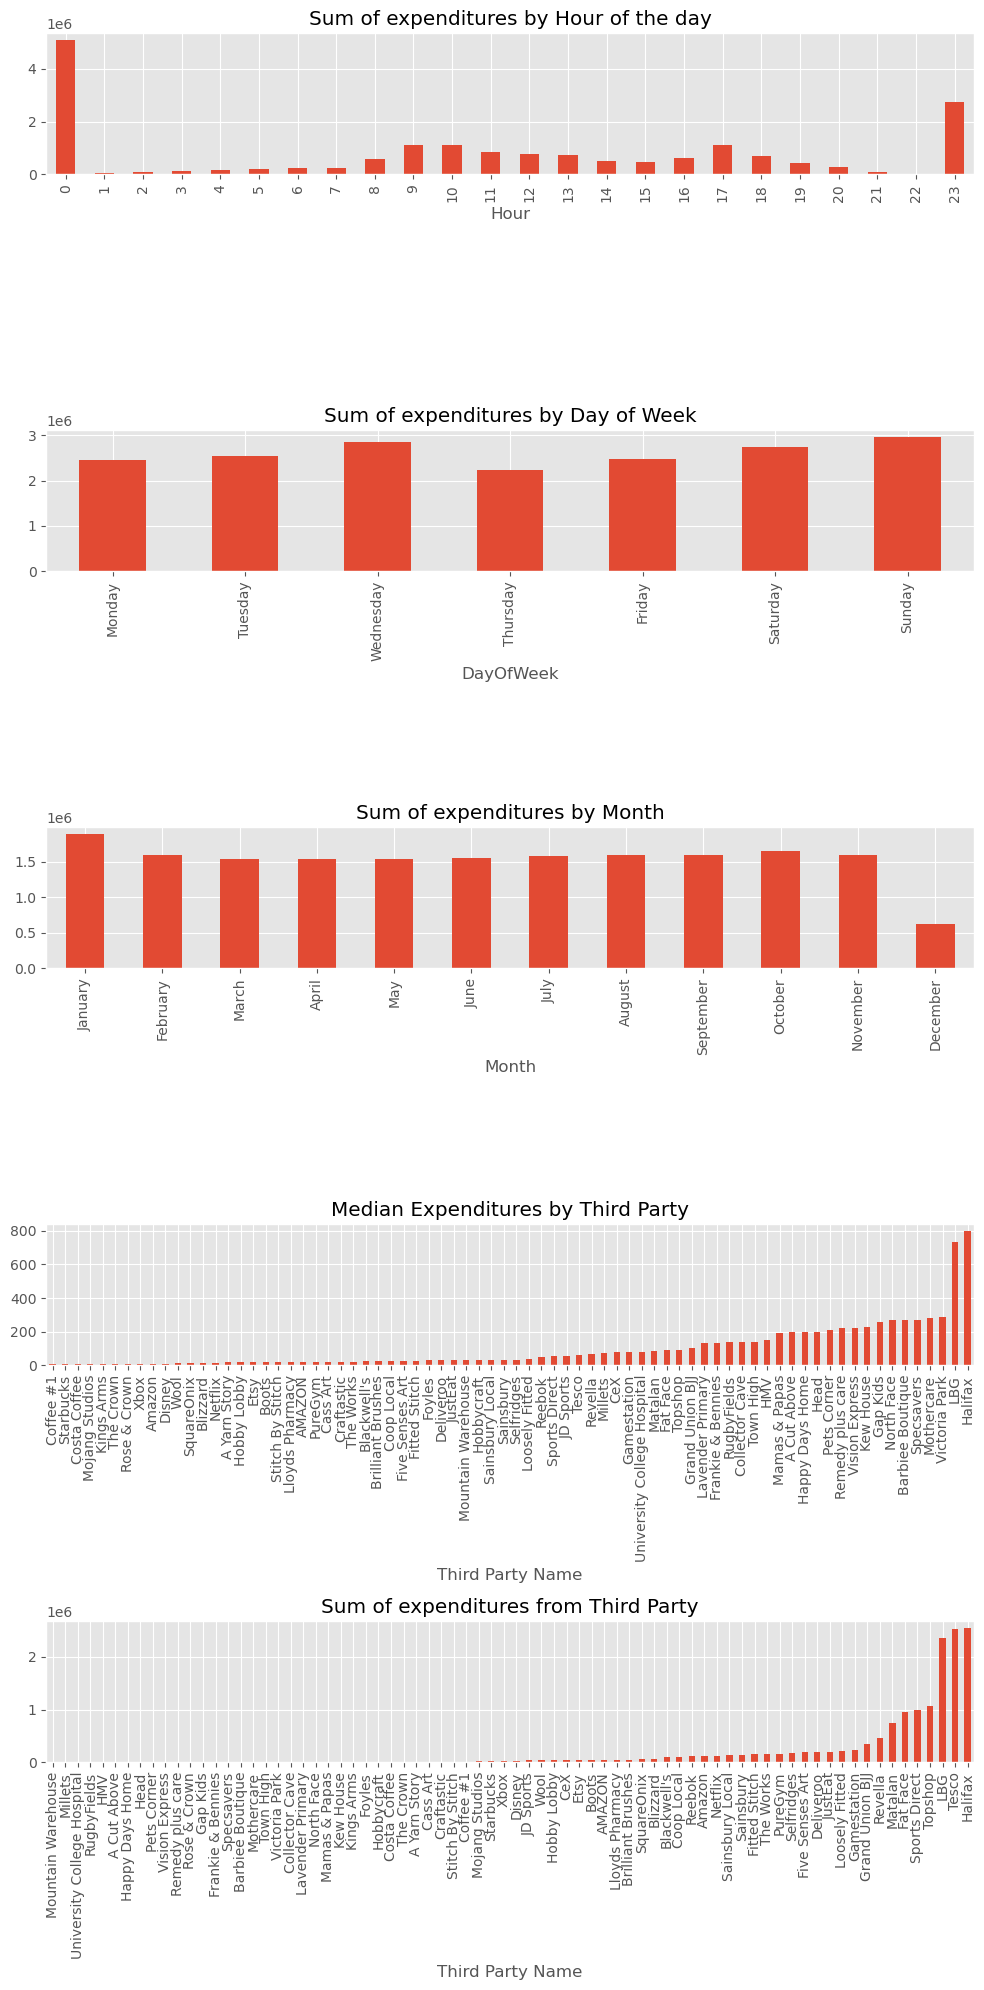

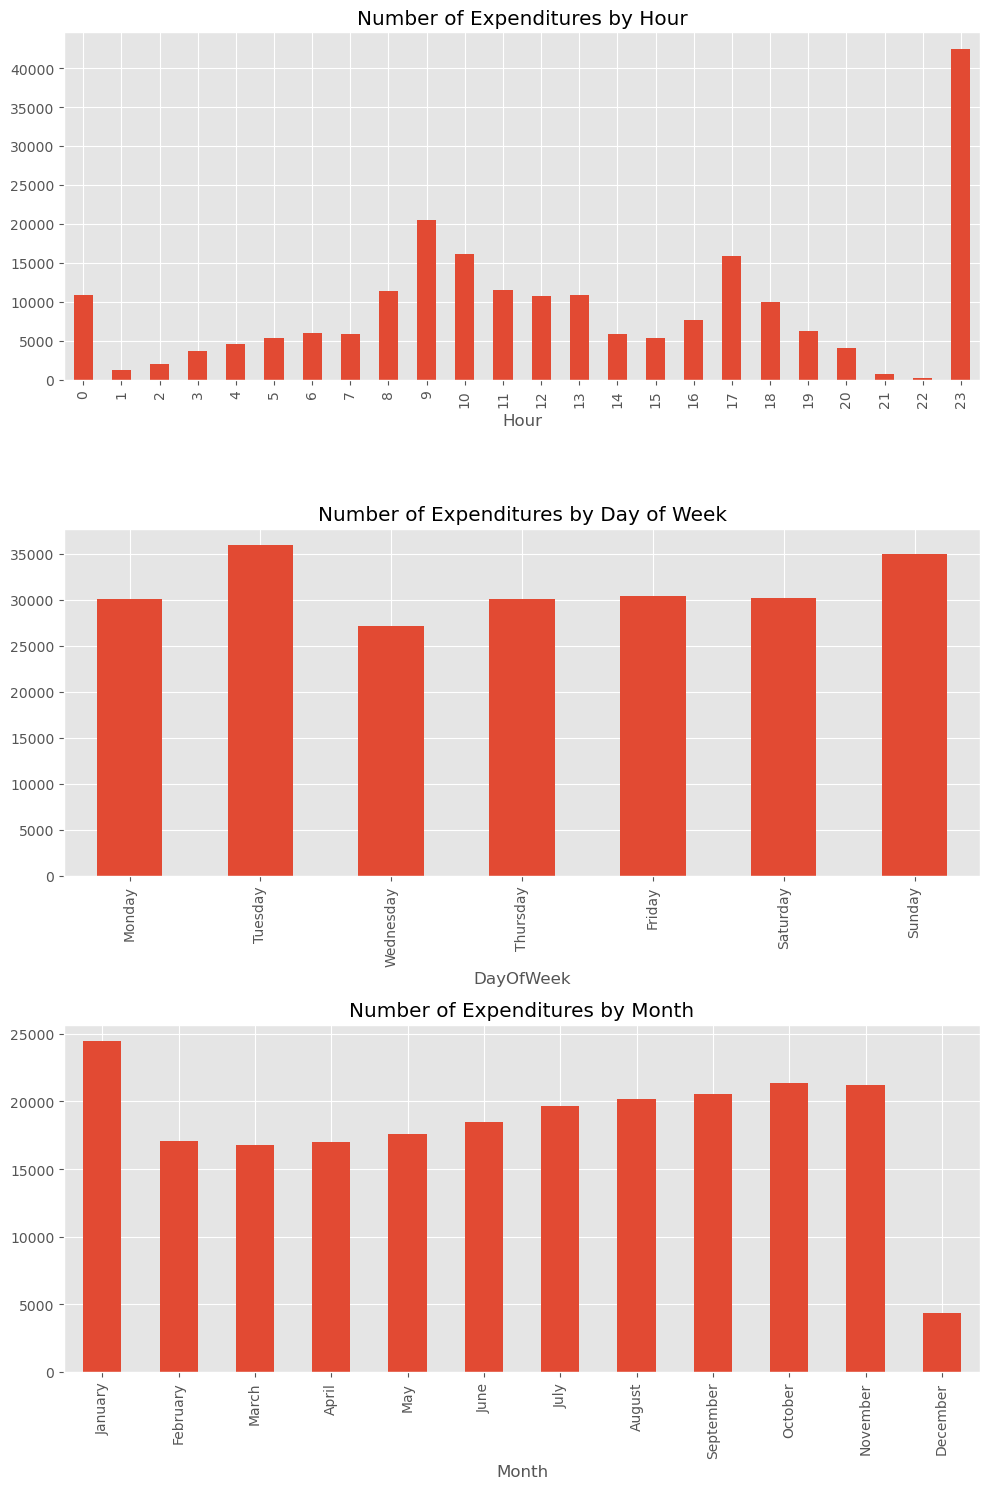

In [33]:
plt.style.use('ggplot')
# Formatting datetime information
expenditures_df['Datetime'] = pd.to_datetime(expenditures_df['Datetime'])
expenditures_df['Date'] = pd.to_datetime(expenditures_df['Date'], dayfirst=True)
expenditures_df['Hour'] = expenditures_df['Datetime'].dt.hour
expenditures_df['DayOfWeek'] = expenditures_df['Datetime'].dt.day_name()
expenditures_df['Month'] = expenditures_df['Datetime'].dt.month_name()

# Analysis by Hour, Day of the Week, and Month
expenditures_by_hour = expenditures_df.groupby('Hour')['Amount'].sum()
expenditures_by_day = expenditures_df.groupby('DayOfWeek')['Amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
expenditures_by_month = expenditures_df.groupby('Month')['Amount'].sum().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Analysis by third party business
median_expenditures_third_party = expenditures_df.groupby('Third Party Name')['Amount'].median().sort_values()
expenditures_third_party = expenditures_df.groupby('Third Party Name')['Amount'].sum().sort_values()

# Transaction Counts by Hour, Day of the Week, and Month
expenditures_by_hour_count = expenditures_df.groupby('Hour').size()
expenditures_by_day_count = expenditures_df.groupby('DayOfWeek').size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
expenditures_by_month_count = expenditures_df.groupby('Month').size().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Visualising the Amounts Spent
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
expenditures_by_hour.plot(kind='bar', ax=axs[0], title='Sum of expenditures by Hour of the day')
expenditures_by_day.plot(kind='bar', ax=axs[1], title='Sum of expenditures by Day of Week')
expenditures_by_month.plot(kind='bar', ax=axs[2], title='Sum of expenditures by Month')
median_expenditures_third_party.plot(kind='bar', ax=axs[3], title='Median Expenditures by Third Party')
expenditures_third_party.plot(kind='bar', ax=axs[4], title='Sum of expenditures from Third Party')
plt.tight_layout()

# Visualising the Number of Transactions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
expenditures_by_hour_count.plot(kind='bar', ax=axs[0], title='Number of Expenditures by Hour')
expenditures_by_day_count.plot(kind='bar', ax=axs[1], title='Number of Expenditures by Day of Week')
expenditures_by_month_count.plot(kind='bar', ax=axs[2], title='Number of Expenditures by Month')
plt.tight_layout()

plt.show()


### Observations 

- At 0:00 and 23:00 is when the largest sum of expenditures is: could be direct debits (rent, mortgage repayments, subscriptions - gym, netflix, bills etc)
- The monthly subscriptions are Puregym, Disney, Mojang studios, Xbox, Blizzard, SquareOnix, Netflix, Amazon, Grand Union BJJ- from looking at the dataframe
- The third parties that have the highest median transactions are: Halifx, LBG, Victoria Park, Mothercare, NorthFace
- The third parties with the highest sums of transactions are: Halifax, Tesco, LBG, TopShop, Sports Direct, FatFace
- Number of Expenditures by hour: one peak in the morning at 9:00, secondary peak at (17:00), and the highest peak of expenditures at 23:00

### Payments: EDA

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_26402/3207228309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_df['Datetime'] = pd.to_datetime(payments_df['Datetime'])
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_26402/3207228309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_df['Date'] = pd.to_datetime(payments_df['Date'], dayfirst=True)
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_26402/3207228309.py:4: SettingWithCopyWarning: 
A value is

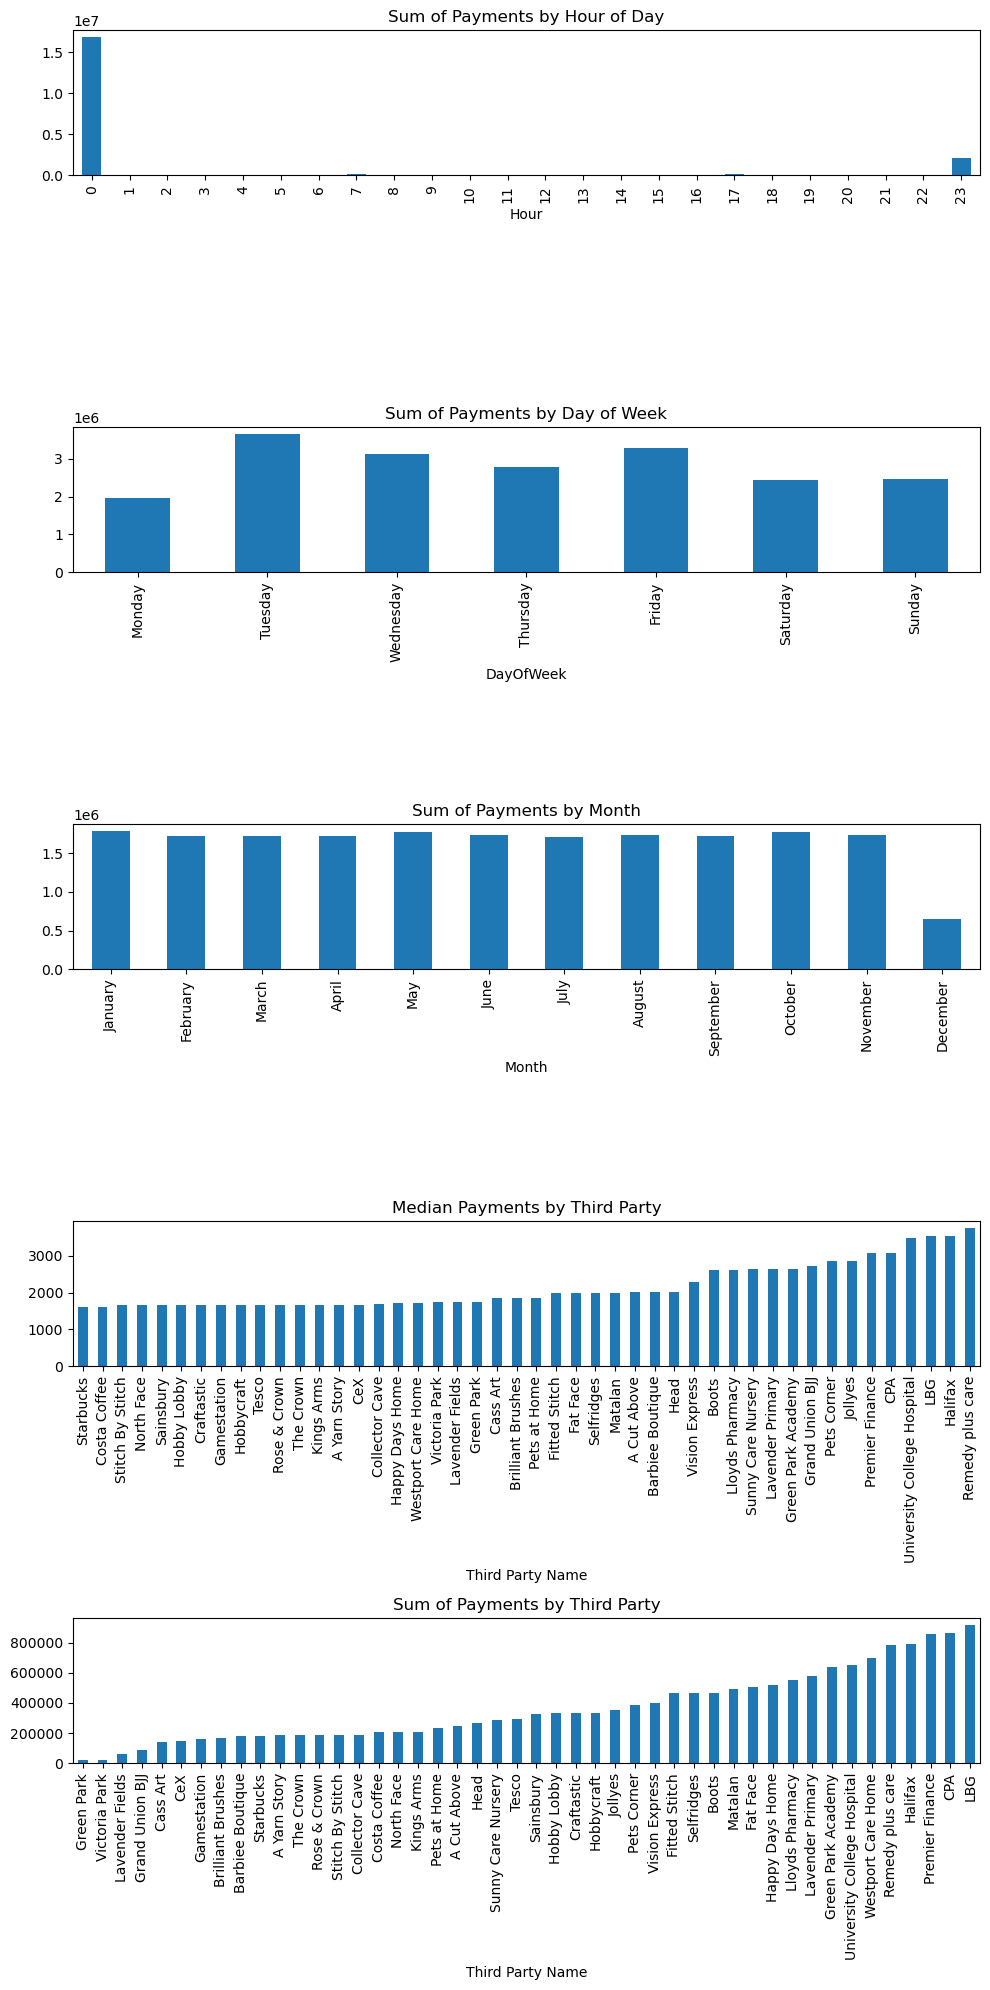

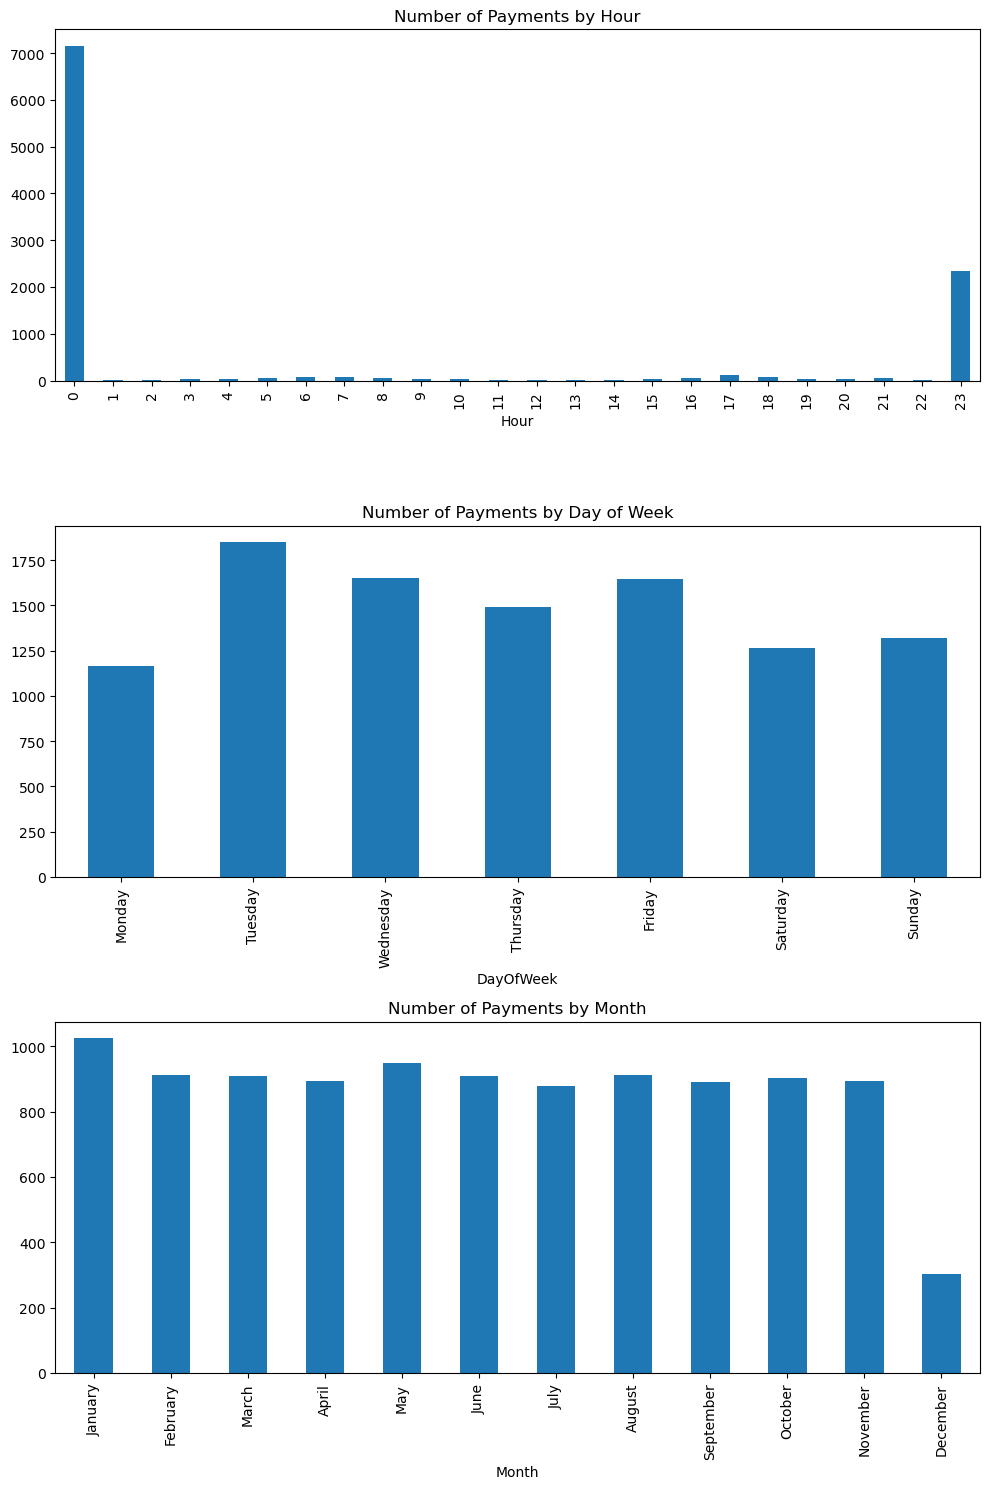

In [23]:
# Formatting datetime information for analysis
payments_df['Datetime'] = pd.to_datetime(payments_df['Datetime'])
payments_df['Date'] = pd.to_datetime(payments_df['Date'], dayfirst=True)
payments_df['Hour'] = payments_df['Datetime'].dt.hour
payments_df['DayOfWeek'] = payments_df['Datetime'].dt.day_name()
payments_df['Month'] = payments_df['Datetime'].dt.month_name()

# Analysis by Hour, Day of the Week, and Month
payments_by_hour = payments_df.groupby('Hour')['Amount'].sum()
payments_by_day = payments_df.groupby('DayOfWeek')['Amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
payments_by_month = payments_df.groupby('Month')['Amount'].sum().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])


# Analysis by third party business
median_payments_third_party = payments_df.groupby('Third Party Name')['Amount'].median().sort_values()
payments_third_party = payments_df.groupby('Third Party Name')['Amount'].sum().sort_values()

# Transaction Counts by Hour, Day of the Week, and Month
payments_by_hour_count = payments_df.groupby('Hour').size()
payments_by_day_count = payments_df.groupby('DayOfWeek').size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
payments_by_month_count = payments_df.groupby('Month').size().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Visualising the Amounts Paid
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
payments_by_hour.plot(kind='bar', ax=axs[0], title='Sum of Payments by Hour of Day')
payments_by_day.plot(kind='bar', ax=axs[1], title='Sum of Payments by Day of Week')
payments_by_month.plot(kind='bar', ax=axs[2], title='Sum of Payments by Month')
median_payments_third_party.plot(kind='bar', ax=axs[3], title='Median Payments by Third Party')
payments_third_party.plot(kind='bar', ax=axs[4], title='Sum of Payments by Third Party')

plt.tight_layout()

# Visualising the Number of Transactions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
payments_by_hour_count.plot(kind='bar', ax=axs[0], title='Number of Payments by Hour')
payments_by_day_count.plot(kind='bar', ax=axs[1], title='Number of Payments by Day of Week')
payments_by_month_count.plot(kind='bar', ax=axs[2], title='Number of Payments by Month')
plt.tight_layout()

plt.show()


### Observations

- At 0:00 and 23:00 is when the largest sum of payments is: could be incomes, direct debits (rent payments to landlords accounts)
- Median of Payments by third party: this could indicate monthly salaries by different third parties= the highest are Remedy Plus care, Halifax, LBG and University College Hospital (around 3000), and the lowest are Starbucks and Cost around 1600.

## Create industries - by median expenditure and payments

Using the tableau file to identify patterns in the median payment/expenditure for each third party name and manually group them into industries. All the third parties are businesses in Bristol. This is difficult to balance for expenditures and payments, so going to create two industry categories, one for payments and one for expenditure, this will be more useful when it comes to anomaly detection.

In [41]:
industry_categories_expenditure = {
    "Coffee": ["Coffee #1", "Costa Coffee", "Starbucks"],
    "Technology and Gaming": ["Mojang Studios", "Xbox", "Blizzard", "SquareOnix"],
    "Entertainment and Media": ["Netflix", "Disney", "Amazon"],
    "Retail - Crafts, Hobbies and Books": ["Wool", "Etsy", "Hobby Lobby", "Cass Art", "Craftastic", "Hobbycraft", "The Works", "Blackwell's", "Brilliant Brushes", "Five Senses Art", "A Yarn Story", "Foyles", "AMAZON", "Stitch By Stitch", "Fitted Stitch"],
    "Retail - Clothing and Fashion": ["Reebok", "Sports Direct", "JD Sports", "Tesco", "Matalan", "Fat Face", "Topshop", "Revella", "Mountain Warehouse", "Millets", "Loosely Fitted"],
    "Retail - General and Department Stores": ["Coop Local", "Sainsbury Local", "Sainsbury", "Selfridges"],
    "Retail - High end": ["Barbiee Boutique", "North Face", "Collector Cave"],
    "Retail- Kids": ["Mamas & Papas", "Mothercare", "Gap Kids"],
    "Retail - services ": ["Vision Express", "Pets Corner", "Head", "A Cut Above", "Specsavers"],
    "Health and Fitness": ["PureGym", "Grand Union BJJ"],
    "Pharmacy": ["Boots", "Lloyds Pharmacy"],
    "Hospital and Care Home": ["University College Hospital", "Happy Days Home", "Remedy plus care"],
    "Electronics and Entertainment Retail": ["CeX", "Gamestation", "HMV"],
    "Child Care and Education": ["Lavender Primary", "Town High", "RugbyFields"],
    "Care Services": ["Happy Days Home", "Remedy plus care", "Kew House"],
    "Financial Services": ["LBG", "Halifax"],
    "Pubs": ["Kings Arms", "The Crown", "Rose & Crown"],
    "Takeaway": ["Deliveroo", "JustEat"],
    "Restaurant": ["Frankie & Bennies"],
    "Park": ["Victoria Park"]
    
}



In [40]:
industry_categories_payments = {
    "Coffee": ["Costa Coffee", "Starbucks"],
    "Retail": ["A Yarn Story", "Hobby Lobby", "Craftastic", "Hobbycraft", "North Face", "CeX", "Gamestation", "Collector's Items", "Stitch By Stitch"],
    "Supermarket and Hospitality": ["Sainsbury", "Tesco", "Kings Arms", "Rose & Crown", "The Crown"],
    "Art and Pets": ["Brilliant Brushes", "Cass Art", "Pets at Home"],
    "High end retail": ["Fat Face", "Matalan", "Barbiee Boutique", "Selfridges", "Fitted Stitch"],
    "Care Home": ["Happy Days Home", "Westport Care Home"],
    "Education": ["Sunny Care Nursery", "Green Park Academy", "Lavender Primary"], 
    "Medical": ["Remedy plus care", "University College Hospital"], 
    "Hairdressers": ["A Cut Above", "Head"],
    "Opticians": ["Vision Express"],
    "Pharmacy": ["Boots", "Lloyds Pharmacy"],
    "Vet": ["Jollyes", "Pets Corner"],
    "Financial Services": ["CPA", "Premier Finance", "Halifax", "LBG"], 
    "Parks": ["Victoria Park", "Lavender Fields", "Green Park"], 
    "Fitness": ["Grand Union BJJ"]

}

## User dataframe by expenditures

Add more columns to this as needed

In [32]:
# Grouping by 'Account No' to get the aggregated data for each user

expenditures_by_users = expenditures_df.groupby('Account No').agg(
    total_transactions=('Amount', 'count'),
    total_spent=('Amount', 'sum'),
    median_transaction=('Amount', 'median'),
    mean_transaction=('Amount', 'mean'),
    business_interactions=('Third Party Name', lambda x: list(x.dropna().unique())),
    user_interactions=('Third Party Account No', lambda x: list(x.dropna().unique())),
    median_balance=('Balance', 'median'), 
    most_recent_transaction=('Datetime', 'max')
).reset_index()


expenditures_by_users.to_csv('SavedData/dataset2_expenditures_by_users.csv', index=False)

expenditures_by_users.head()

,Account No,total_transactions,total_spent,median_transaction,mean_transaction,business_interactions,user_interactions,median_balance,most_recent_transaction
0,101531259.0,110,17627.58,88.580,160.250727,"[LBG, Disney, Grand Union BJJ, Matalan, Topsho...",[],121.485500,2023-12-05 12:44:00
1,104832000.0,150,25115.52,49.920,167.436800,"[LBG, Netflix, Grand Union BJJ, Blizzard, Tesc...",[587923845.0],-1570.912359,2023-12-03 10:53:00
2,105375973.0,146,10067.28,48.160,68.953973,"[PureGym, Netflix, Amazon, Blackwell's, Tesco,...",[],144.114960,2023-12-03 12:32:00
3,106601471.0,180,7760.01,19.965,43.111167,"[Mojang Studios, Netflix, The Crown, Blackwell...",[],7355.841600,2023-12-06 20:43:00
4,108481285.0,344,15062.28,21.510,43.785698,"[Disney, Amazon, PureGym, Blackwell's, Sainsbu...",[913801979.0],7284.825314,2023-12-06 03:36:00


## User dataframe by payments

In [26]:
# Grouping by 'Account No' to get the aggregated data for each user
payments_to_users = payments_df.groupby('Account No').agg(
    total_transactions=('Amount', 'count'),
    total_payments=('Amount', 'sum'),
    median_payment=('Amount', 'median'),
    mean_payment=('Amount', 'mean'),
    business_interactions=('Third Party Name', lambda x: list(x.dropna().unique())),
    user_interactions=('Third Party Account No', lambda x: list(x.dropna().unique()))
).reset_index()

payments_to_users


,Account No,total_transactions,total_payments,median_payment,mean_payment,business_interactions,user_interactions
0,101531259.0,11,16967.5,1542.5,1542.500000,[Hobbycraft],[]
1,104832000.0,14,20550.0,1675.0,1467.857143,[A Yarn Story],[587923845.0]
2,105375973.0,10,9000.0,900.0,900.000000,[],[709632525.0]
3,106601471.0,11,18425.0,1675.0,1675.000000,[Hobbycraft],[]
4,108481285.0,23,25104.0,640.0,1091.478261,[Happy Days Home],[913801979.0]
...,...,...,...,...,...,...,...
871,995615876.0,11,19063.0,1733.0,1733.000000,[Matalan],[]
872,996042490.0,11,41250.0,3750.0,3750.000000,[Lloyds Pharmacy],[]
873,998390769.0,12,19500.0,1625.0,1625.000000,[Kings Arms],[]
874,998405607.0,13,6900.0,450.0,530.769231,[],[388862238.0]


This dataframe likely represents incomes

In [27]:
payments_to_users.to_csv('SavedData/dataset2_payments_by_users.csv', index=False)